In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [89]:
df = pd.read_csv('finalSet.csv')
df.head()

,booking_date,travel_date,route_type,travel_class,flight_number,price,total_duration,n_stops,carbon_this,delayed_any,layover_total_duration,days_to_departure,avg_stop_duration
0,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 985,596,1390,1,1094000,False,125,27,125.0
1,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,602,1380,1,1123000,False,275,27,275.0
2,2025-05-14 16:47:50,2025-06-11,One way,Economy,CX 742,645,1315,1,888000,False,245,27,245.0
3,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 983,596,1485,1,966000,False,220,27,220.0
4,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,606,1591,2,948000,True,432,27,216.0


In [90]:
df['days_to_departure'].value_counts()

days_to_departure
 27    28
 12    27
 13    25
 41    24
 26    24
 40    23
-1     22
Name: count, dtype: int64

In [91]:
df.describe(include='all')

,booking_date,travel_date,route_type,travel_class,flight_number,price,total_duration,n_stops,carbon_this,delayed_any,layover_total_duration,days_to_departure,avg_stop_duration
count,173,173,173,173,173,173.000000,173.000000,173.000000,1.730000e+02,173,173.000000,173.000000,173.000000
unique,14,4,1,2,19,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,2025-05-14 16:47:50,2025-06-11,One way,Economy,NH 898,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
freq,14,52,173,88,29,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2067.190751,1541.115607,1.202312,2.443347e+06,NaN,392.156069,22.606936,326.798651
std,NaN,NaN,NaN,NaN,NaN,1403.870055,322.829422,0.430785,1.490179e+06,NaN,315.458625,13.955759,256.487757
min,NaN,NaN,NaN,NaN,NaN,559.000000,1235.000000,1.000000,7.570000e+05,NaN,90.000000,-1.000000,90.000000
25%,NaN,NaN,NaN,NaN,NaN,680.000000,1345.000000,1.000000,9.760000e+05,NaN,205.000000,12.000000,195.000000
50%,NaN,NaN,NaN,NaN,NaN,2554.000000,1435.000000,1.000000,1.992000e+06,NaN,245.000000,26.000000,230.000000
75%,NaN,NaN,NaN,NaN,NaN,2992.000000,1705.000000,1.000000,3.864000e+06,NaN,630.000000,40.000000,352.500000


In [92]:
# df.info()
df.isnull().sum()

booking_date              0
travel_date               0
route_type                0
travel_class              0
flight_number             0
price                     0
total_duration            0
n_stops                   0
carbon_this               0
delayed_any               0
layover_total_duration    0
days_to_departure         0
avg_stop_duration         0
dtype: int64

In [93]:
#Change -1 day left to 0
df['days_to_departure'] = df['days_to_departure'].replace(-1, 0)
df['days_to_departure'].value_counts()

days_to_departure
27    28
12    27
13    25
41    24
26    24
40    23
0     22
Name: count, dtype: int64

In [94]:
df['delayed_any'] = df['delayed_any'].replace({True: 1, False: 0})
df['delayed_any']

C:\Users\jimmy\AppData\Local\Temp\ipykernel_193184\1095073554.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['delayed_any'] = df['delayed_any'].replace({True: 1, False: 0})


0      0
1      0
2      0
3      0
4      1
      ..
168    1
169    0
170    0
171    0
172    0
Name: delayed_any, Length: 173, dtype: int64

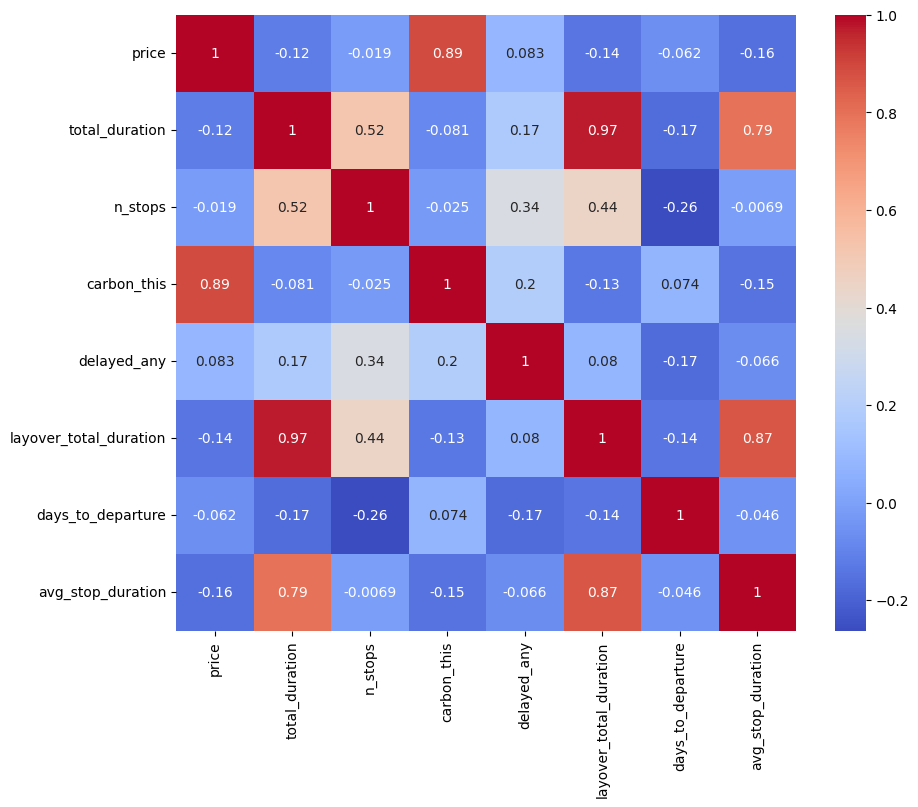

In [95]:
numeric_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm")
plt.show()

In [96]:
numeric_features.info()
numFeats = numeric_features
numFeats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   173 non-null    int64  
 1   total_duration          173 non-null    int64  
 2   n_stops                 173 non-null    int64  
 3   carbon_this             173 non-null    int64  
 4   delayed_any             173 non-null    int64  
 5   layover_total_duration  173 non-null    int64  
 6   days_to_departure       173 non-null    int64  
 7   avg_stop_duration       173 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 10.9 KB


,price,total_duration,n_stops,carbon_this,delayed_any,layover_total_duration,days_to_departure,avg_stop_duration
0,596,1390,1,1094000,0,125,27,125.0
1,602,1380,1,1123000,0,275,27,275.0
2,645,1315,1,888000,0,245,27,245.0
3,596,1485,1,966000,0,220,27,220.0
4,606,1591,2,948000,1,432,27,216.0
...,...,...,...,...,...,...,...,...
168,2967,1442,2,2973000,1,250,13,125.0
169,3112,1745,1,4053000,0,655,13,655.0
170,3955,1260,1,4488000,0,195,13,195.0
171,3988,1235,1,3904000,0,90,13,90.0


In [97]:
encoder = OrdinalEncoder(categories=[['Economy', 'Business Class']])
df['class_encoded'] = encoder.fit_transform(df[['travel_class']])
df['class_encoded']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
168    1.0
169    1.0
170    1.0
171    1.0
172    1.0
Name: class_encoded, Length: 173, dtype: float64

In [98]:
x = numFeats
y = df['class_encoded'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [99]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is: {acc}')

Accuracy of the model is: 0.9885057471264368


In [100]:
from sklearn.metrics import classification_report
print("Report for accuracy:\n", classification_report(y_test, y_pred))

Report for accuracy:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        45
         1.0       1.00      0.98      0.99        42

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87



In [102]:
x = numFeats.drop(columns=['layover_total_duration', 'avg_stop_duration'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accur = accuracy_score(y_test, y_pred)
print(f'Model accuracy after feature selection is: {accur}')

Model accuracy after feature selection is: 1.0


In [103]:
print("Report for accuracy validation after feature selection is:\n", classification_report(y_test, y_pred))

Report for accuracy validation after feature selection is:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45
         1.0       1.00      1.00      1.00        42

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

